In [830]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

Importing from cleaned data notebook

In [831]:
data = pd.read_csv('data_clean.csv')

In [832]:
data.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q3_balance,range,max,min
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1095.0,792.0,1669.0,877.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,78.0,327.0,366.0,39.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,145.0,222.0,367.0,145.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1119.0,1341.0,1760.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,982.0,1775.0,2140.0,365.0


In [833]:
data.shape

(18000, 16)

In [834]:
data["offer_accepted"].value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

Removing Outliers

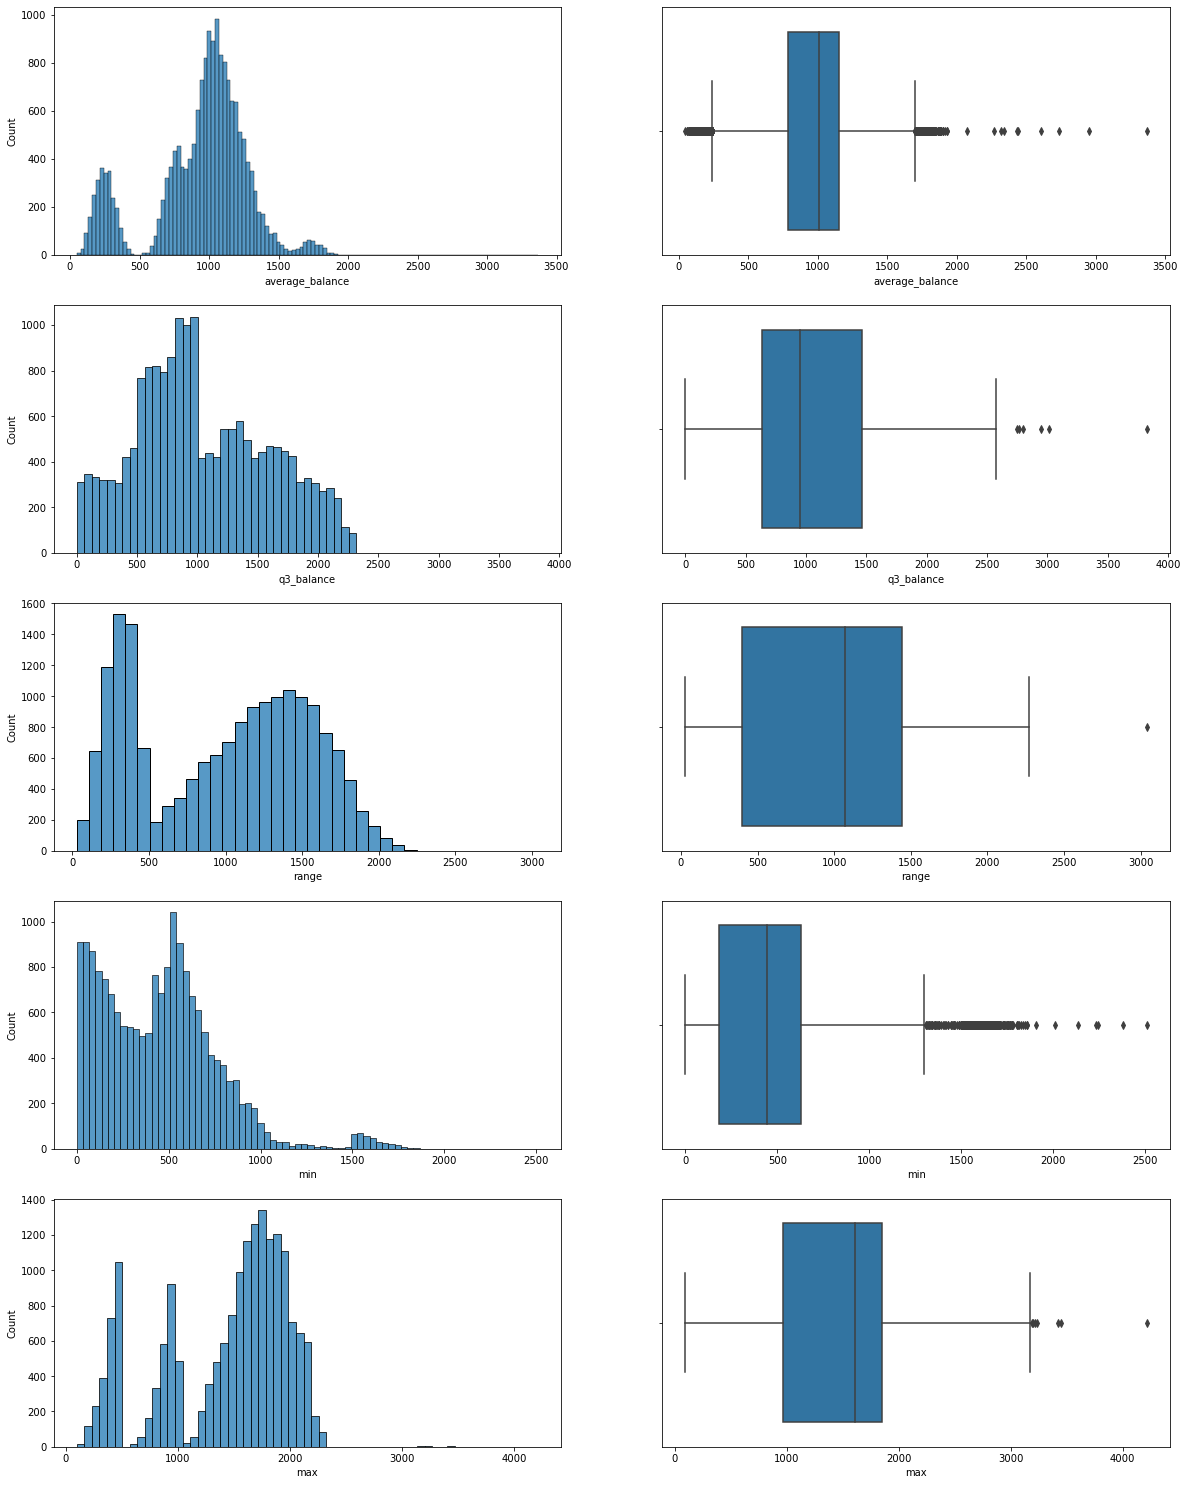

In [836]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(5,2,figsize = (20, 20)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 

sns.histplot(data["average_balance"], ax=ax1)
sns.boxplot(data['average_balance'], ax=ax2)
sns.histplot(data['q3_balance'], ax=ax3)
sns.boxplot(data['q3_balance'], ax=ax4)
sns.histplot(data['range'], ax=ax5)
sns.boxplot(data['range'], ax=ax6)
sns.histplot(data['min'], ax=ax7)
sns.boxplot(data['min'], ax=ax8)
sns.histplot(data['max'], ax=ax9)
sns.boxplot(data['max'], ax=ax10)

plt.show()



In [ ]:
iqr = np.percentile(data['average_balance'],75) - np.percentile(data['average_balance'],25)
upper_limit = np.percentile(data['average_balance'],75) + 2*iqr
lower_limit = np.percentile(data['average_balance'],25) - 2*iqr
data =data[(data['average_balance']>lower_limit) & (data['average_balance']<upper_limit)]

In [ ]:
data.boxplot(column=['average_balance'])

In [ ]:
iqr = np.percentile(data['q3_balance'],75) - np.percentile(data['q3_balance'],25)
upper_limit = np.percentile(data['q3_balance'],75) + 1.5*iqr
lower_limit = np.percentile(data['q3_balance'],25) - 1.5*iqr
data =data[(data['q3_balance']>lower_limit) & (data['q3_balance']<upper_limit)]

In [ ]:
data.boxplot(column=['q3_balance'])

In [ ]:
iqr = np.percentile(data['range'],75) - np.percentile(data['range'],25)
upper_limit = np.percentile(data['range'],75) + 1.5*iqr
lower_limit = np.percentile(data['range'],25) - 1.5*iqr
data =data[(data['range']>lower_limit) & (data['range']<upper_limit)]

In [ ]:
data.boxplot(column=['range'])

In [ ]:
iqr = np.percentile(data['min'],75) - np.percentile(data['min'],25)
upper_limit = np.percentile(data['min'],75) + 2*iqr
lower_limit = np.percentile(data['min'],25) - 2*iqr
data =data[(data['min']>lower_limit) & (data['min']<upper_limit)]

In [ ]:
data.boxplot(column=['min'])

In [837]:
iqr = np.percentile(data['max'],75) - np.percentile(data['max'],25)
upper_limit = np.percentile(data['max'],75) + 2*iqr
lower_limit = np.percentile(data['max'],25) - 2*iqr
data =data[(data['max']>lower_limit) & (data['max']<upper_limit)]

<AxesSubplot:>

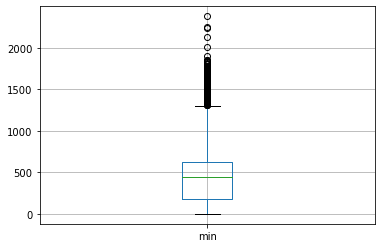

In [838]:
data.boxplot(column=['min'])

In [ ]:
data.shape

In [ ]:
data["offer_accepted"].value_counts()

Splitting numericals and categoricals again

In [ ]:
cat_columns = []
num_columns = []

for i in data.columns:
    if len(data[i].unique()) > 10:
        num_columns.append(i)
    else:
        cat_columns.append(i)   
num = data[num_columns]
cat = data[cat_columns]

Numericals - applying transformations, tested LOG transformation, BoxCox and Square Root

In [ ]:
def log_transform_clean(x):
    if x>0:
        return np.log(x)
    else:
        return 0  # in the code to be used with dataframe, we will use np.NaN here 

In [ ]:
#checking transformations of min

num['min_sqrt'] = num['min']**(1/2)
num["min_log"] = list(map(log_transform_clean, num["min"]))
#min_bc, lmbda = stats.boxcox(data["min"]) -can't do boxcox because some values = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['min'], ax=ax1)
sns.histplot(num['min_sqrt'], ax=ax2)
sns.histplot(num["min_log"], ax=ax3)
#sns.displot(min_bc, ax=ax4)
plt.show()

In [ ]:
num['q3_sqrt'] = num['q3_balance']**(1/2)
num["q3_log"] = list(map(log_transform_clean, num["q3_balance"]))
#q3_bc, lmbda = stats.boxcox(data["q3_balance"]) #can't do boxcox because some values < 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,5)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['q3_balance'], ax=ax1)
sns.histplot(num['q3_sqrt'], ax=ax2)
sns.histplot(num["q3_log"], ax=ax3)
#sns.displot(q3_bc, ax=ax4)

plt.show()

In [ ]:
num['avg_sqrt'] = num['average_balance']**(1/2)
num["avg_log"] = list(map(log_transform_clean, num["average_balance"]))
avg_bc, lmbda = stats.boxcox(num["average_balance"]) 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['average_balance'], ax=ax1)
sns.histplot(num['avg_sqrt'], ax=ax2)
sns.histplot(num["avg_log"], ax=ax3)
sns.histplot(avg_bc, ax=ax4)

plt.show()

In [ ]:
num['range_sqrt'] = num['range']**(1/2)
num["range_log"] = list(map(log_transform_clean, num["range"]))
rng_bc, lmbda = stats.boxcox(num["range"]) 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['range'], ax=ax1)
sns.histplot(num['range_sqrt'], ax=ax2)
sns.histplot(num["range_log"], ax=ax3)
sns.histplot(rng_bc, ax=ax4)

plt.show()

In [ ]:
num['max'] = num['max']**(1/2)
num["max"] = list(map(log_transform_clean, num["max"]))
max_bc, lmbda = stats.boxcox(num["max"]) 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (20,15)) 
plt.subplots_adjust(left=None, bottom=5, right=None, top=6, wspace=None, hspace=None) 
sns.histplot(num['max'], ax=ax1)
sns.histplot(num['max_sqrt'], ax=ax2)
sns.histplot(num["max_log"], ax=ax3)
sns.histplot(max_bc, ax=ax4)

plt.show()

We keep square root for Range and BoxCox for Average Balance

In [ ]:
num.head()

Separate the ordinal categories from categorical

In [ ]:
cat.head()

In [ ]:
#cat["income_level"]=cat["income_level"].apply(lambda x : 3 if x == "High" else(2 if x == "Medium" else 1))

In [ ]:
#cat["credit_rating"]=cat["credit_rating"].apply(lambda x : 3 if x == "High" else(2 if x == "Medium" else 1))

In [ ]:
cat["own_your_home"] = cat["own_your_home"].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
cat["overdraft_protection"] = cat["overdraft_protection"].apply(lambda x : 1 if x == "Yes" else 0)

In [ ]:
ord_cat = cat.select_dtypes(exclude = object)

In [ ]:
ord_cat.head()

In [ ]:
#drop some extra features
ord_cat = ord_cat.drop(["bank_accounts_open", "overdraft_protection", "credit_cards_held", 
                        "homes_owned"], axis = 1)
ord_cat = ord_cat.drop(["household_size"], axis = 1)

In [ ]:
ord_cat.head()

Encoding Nominal Categoricals - OneHot Encoder + concat with Scaled Numerical

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='error', drop='first')
enc_cat = pd.DataFrame(enc.fit_transform(cat[['reward', 'mailer_type','income_level', 'credit_rating', "household_size"]]).toarray())


In [ ]:
data_enc = pd.DataFrame(np.concatenate([enc_cat,num, ord_cat], axis =1))

In [ ]:
data_enc.head()

In [ ]:
data_enc.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data_enc)
x_standardized = transformer.transform(data_enc)
print(x_standardized.shape)

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data_enc)
x_normalized = transformer.transform(data_enc)
print(x_normalized.shape)

In [ ]:
y = data_clean_1['offer_accepted']
X = x_standardized

In [ ]:
data_preprocessed = pd.DataFrame(np.concatenate([X,pd.DataFrame(y)],axis=1))

In [ ]:
data_preprocessed.to_csv('data_preprocessed.csv', index=False)